# Neural Networks

Author: Jacob McCabe

## Overview

This notebook will take a look at Neural Networks (NNs). The main ideas covered will include:

1. What is a Neural Network?
2. Nodes & Layers
3. Forward Propagation
4. Loss
5. Backward Propagation
6. Gradient Descent
7. Example using `Sequential` model from `Tensorflow.keras`

## What is a Neural Network?

This branch of models within machine learning is supposedly meant to mimic the way brains work by utilizing a dense connection of nodes (sometimes call neurons) to find complex, nonlinear relationships between features. These models rely on training data to determine a series of weights and biases, and generally improve their accuracy over time. To do this, a dataset is first split into two subsets: training and test. We are only going to consider NNs for supervised learning, meaning we assume all data points have a corresponding output.

The training data contains the majority of the data since the goal is to find some generalization that leads to accurate predictions. The training data is composed of features and a target. The features are the input data; in a two-dimensional model of points $(x,y)$, it would be $x$. The target is what we want to predict - the output. In our two-dimensional model it would be $y$. The number of data points in the set is usually represented by $n$.

The test data is a smaller subset of the data. Like the training data, there are features and targets that are the in the same dimensional space. The important difference is that when the test set is only used at the very end of experimentation, after the model has been trained. Using it this way allows for a generalization of how well the NN is able to make predictions on new data.

The general structure of training a NN is as follows:

```
train_nn(X, y, n_epochs, learn_rate):
    W, b = init_weights()
    loss = []

    for epoch in 1..n_epoch do
        A, Z = forward_propagate(X, W, b)
        loss.append(calculate_loss(A, y))
        dW, db = back_propagate(W, b, A, Z, y)
        W, b = gradient_descent(W, b, dW, db, learn_rate)
    od
    
    return W, b, loss
```

## Layers

A basic single-hidden-layer NN is composed of an **input layer**, a **hidden layer**, and an **output layer**. Each layer is composed of a number nodes that all communicate information to the next layer via a ***pre-activation***  and an ***post-activation***. These are usually called $z_i$ and $a_i$, respectively, for $i\in[0,l]$ where $l$ is the number of layers. This makes the training data, $x = a_0$. 

While the size (number of nodes) of the input and output layer are predefined by the specific problem, the model structure can be modified by changing the size and number of hidden layers. An input layer's size is defined by the dimension of the input, so for data with three-dimensional input there would be 3 nodes in the input layer. For the output layer if we are doing binary classification or regression, then there is one node. If we are doing multi-class classification, there is a node for each class.

At each layer, $l$, there is a weight matrix ($W_{(l)}$) and bias vector ($b_{(l)}$). These are what the model aims to itertaively train and tune.

<img src="images/shl_nn_diagram.png" alt="shl_diagram" height="35%" width="35%">

## Forward Propagation

Forward propagation is the process of feeding data through the NN to make generate an output. The general structure of the process is as follows:    
$z_i = W^{T}x + b$    
$a_i = f(z_i)$    
As mentioned earlier, these two steps are sometimes called ***pre-activation*** and ***post-activation*** for computing the $z_i$ and $a_i$. There are many options for the activations functions $f(\cdot)$. For the hidden layers, common activations functions used are `ReLU`, `sigmoid`, and `tanh`. The activation function for the output layer depends upon the problem being solved. 
- Regression: `linear` activation
- Binary classification: `sigmoid` acitvation
- Multi-class classification: `softmax` activation

## Loss

Using a loss function allows the network to keep track of how well it's doing. It generally shows how far we are from the 'ideal' solution. The choice of a loss function also depends upon the type of problem. For example, a regression model will typically use mean squared error for the loss while a classification model will use cross-entropy.

## Backward Propagation

Backward propagation is the process of taking the loss from forward propagation and using it to compute the gradients of our weights and biases. As the name suggests, instead of starting at the first layer and progressing to the last layer as we did in forward propagation, we are going to start at the output layer and move towards the input layer. This involves some differential calculus, but if we chose our output activation and loss function wisely it is significantly easier (as was described in the Loss section). I won't go into the nitty-gritty details of the derivation, but it's important to understand that $dW$ and $db$ are partial derivatives of the loss function, and can be found using the chain rule. The dimensions of the gradients are going to be the same as $W$ and $b$. The sequence of equations are as follows:    
$dW_{l} = \frac{\partial L}{\partial W_{l}} = dZ_{l}A_{l-1}^T$    
$db_{l} = \frac{\partial L}{\partial b_{l}} = dZ_{l}$    
$dA_{l-1} = \frac{\partial L}{\partial A_{l-1}} = W_{l}dZ_{l}$    
$dZ_{l} = \frac{\partial L}{\partial Z_{l}} = dA_{l}f'(Z_{l})$    
In the last of these equations, we see $f'(\cdot)$. This is the derivative of the activation function used at this layer. These derivative functions are well-defined, and the only hiccup is for the output layer. $dZ$ for the output layer is $dZ = \hat{y} - y$ where $\hat{y}$ is the final $A$ coming from forward propagation and $y$ is our set of true labels. Of course, this only works when we pair our loss and output activations wisely. Otherwise, it is more complicated and outside the scope of this notebook.

## Gradient Descent

Doing backward propagation provided us with the gradients, and now we need to use that information to update our weights and biases. We will do this by taking a small step in the direction of the negative gradient. The equations for updating our weights and biases with gradient descent are the following:    
$W_{l} = W_{l} - \alpha dW_{l}$    
$b_{l} = b_{l} - \alpha db_{l}$    
So at each layer, $l$, we update $W$ and $b$ by moving in the direction of ***steepest descent*** in hopes of settling into a local minumum. The step size $\alpha$ is a hyperparameter that needs to be tuned. By using too large of a step size, the NN will be chaotic and won't be able to find a minimum. Setting it too small means that the model will learn too slowly, and will take forever to reach a minimum. Because of this, there are techniques of learning rate decay, where the model starts at a larger value and decreases over time to increase the chances of settling into a better minimum. 

## Resources

- [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)
- [Image](https://lassehansen.me/post/neural-networks-step-by-step/)
- [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)
- I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)



## Example using `Sequential` model from `TensorFlow.keras`

#### Import Libraries

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import MeanAbsoluteError

The data we are using is Concrete Compressive Strength. It contains no null values, 8 continuous features, and the target is Concrete Compressive Strength. We will use it to demonstrate basic usage of a feed-forward NN. 

In [12]:
concrete = pd.read_excel(r'data/Concrete_Data.xls')

concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [19]:
X = concrete.copy()
y = X.pop("Concrete compressive strength(MPa, megapascals) ")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)


There are a few basic hyperparameters that we want to define. In most cases, spending time to tune these can lead to scoring significantly better.

In [41]:
learnrate = 1e-3
epochs = 1000
batchsize = 16
verbose = 0 # stops output
input_shape = X_train.shape[1]

For our simple model, we will define 3 hidden layers, each using ReLU for the hidden activation.  

<Axes: >

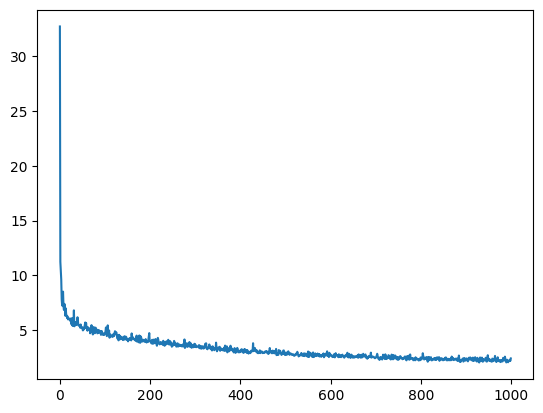

In [52]:
model = Sequential([Dense(units=32, activation='relu', input_shape=[input_shape]),
                    Dense(units=64, activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=1)])
model.compile(optimizer=Adam(), loss=MeanAbsoluteError())
history = model.fit(X_train, y_train, batch_size=batchsize, epochs=epochs, verbose=verbose)

history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

In [54]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 3.4942


3.4941794872283936